In [43]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#Model evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Reading the train data
data = pd.read_csv("/content/drive/MyDrive/playground-series-s3e24/train.csv")
data.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [3]:
#Checking the missing data
data.isna().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [4]:
data.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


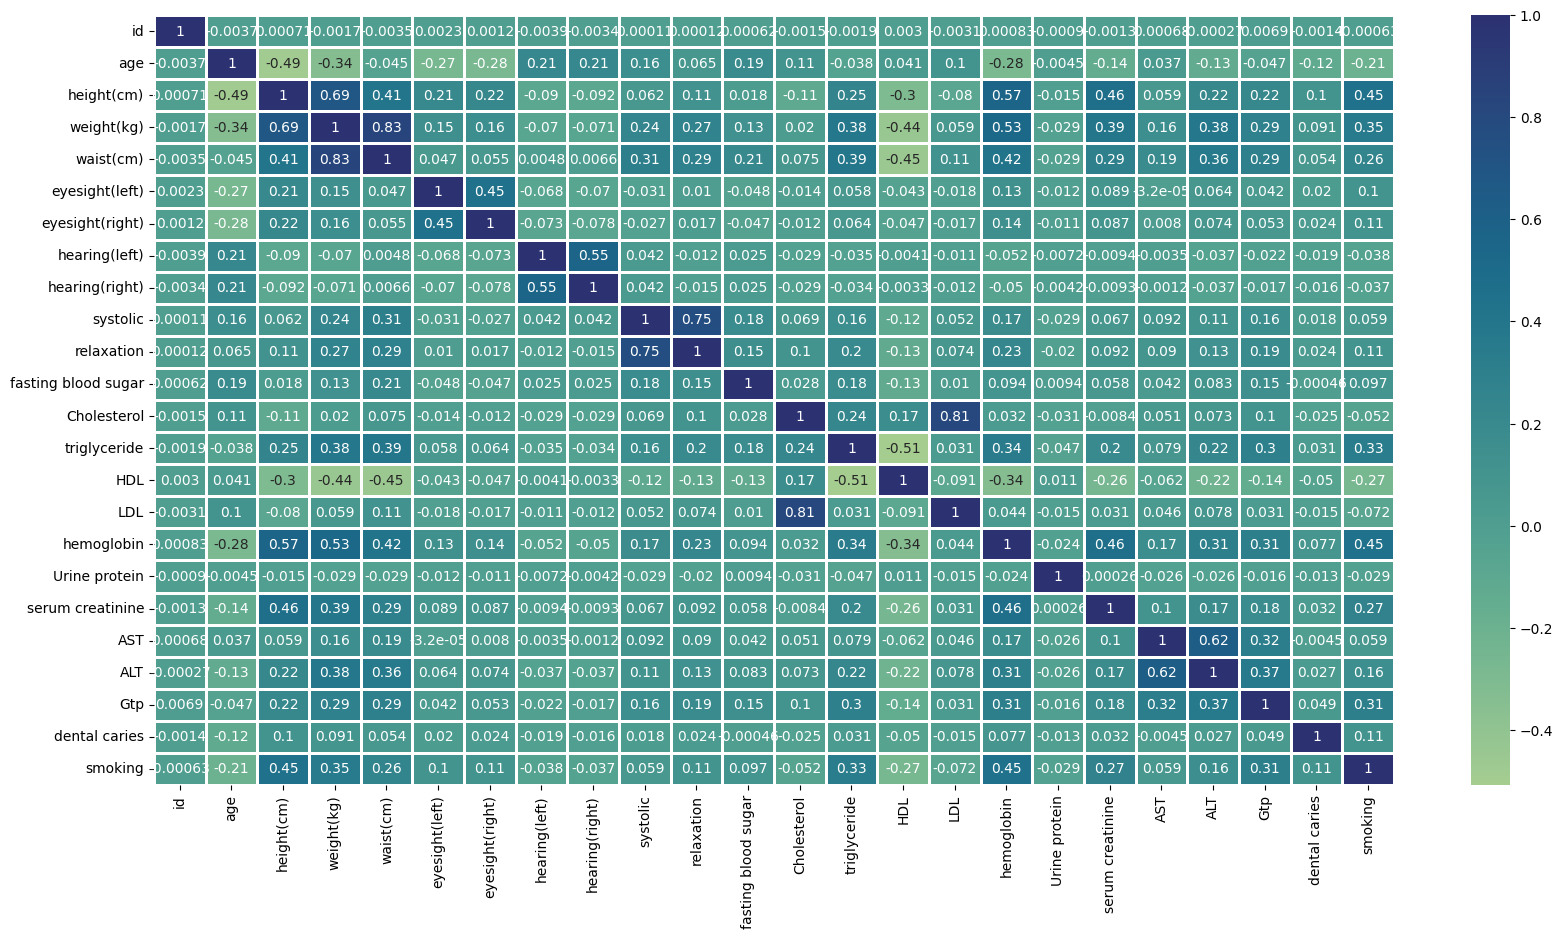

In [5]:
#Data correlation
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(data.corr(), annot = True, linewidths = 1, linecolor = 'white', cmap = 'crest');

In [6]:
#in data there is  any non numerical data i do not have to preporcess the train data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [7]:
X = data.drop("smoking", axis = 1)
y = data["smoking"]

In [8]:
#Splitting the data to validation and train
X_train, X_val, y_train, y_val = train_test_split( X, y, test_size = 0.2, random_state = 42)

In [9]:
models = {"Logistic Regression" : LogisticRegression(),
          "Random Forest" : RandomForestClassifier(),
          "KNN" : KNeighborsClassifier()}
def fit_and_score(models, X_train, X_val, y_train, y_val):
  np.random.seed(42)
  model_scores={}
  for name, model in models.items():
    model.fit(X_train,y_train)
    model_scores[name] = model.score(X_val,y_val)
  return model_scores

In [10]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_val = X_val,
                             y_train = y_train,
                             y_val = y_val)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7216187366570388,
 'Random Forest': 0.7698731633806354,
 'KNN': 0.6566620620369208}

Hyperparameter tuning with RandomizedSearchCV

In [11]:
#Hyperparameter grid for LogisticRegression
grid_log = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

#Hyperparameter grid for RandomForestClassifier
grid_rfc = {"n_estimators": np.arange(10, 500, 100),
           "max_depth": [None, 3, 5],
           "min_samples_split": np.arange(2, 6, 2),
           "min_samples_leaf": np.arange(1, 6, 2)}

In [12]:
np.random.seed(42)
rs_log = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=grid_log,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_log.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [13]:
rs_log.best_params_

{'solver': 'liblinear', 'C': 0.012742749857031334}

In [14]:
rs_log.score(X_val, y_val)

0.7265791787014945

In [15]:
np.random.seed(42)
rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=grid_rfc,
                           cv=2,
                           n_iter=20,
                           verbose=True)
rs_rfc.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5],
                                        'min_samples_leaf': array([1, 3, 5]),
                                        'min_samples_split': array([2, 4]),
                                        'n_estimators': array([ 10, 110, 210, 310, 410])},
                   verbose=True)

In [16]:
rs_rfc.best_params_

{'n_estimators': 310,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_depth': None}

In [17]:
rs_rfc.score(X_val, y_val)

0.7740173301519527

Hyperparameter tuning with GridSearchCV

In [23]:
np.random.seed(42)
gr_rfc = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=grid_rfc,
                           cv=2,
                           n_iter=20,
                           verbose=True)
gr_rfc.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5],
                                        'min_samples_leaf': array([1, 3, 5]),
                                        'min_samples_split': array([2, 4]),
                                        'n_estimators': array([ 10, 110, 210, 310, 410])},
                   verbose=True)

In [25]:
gr_rfc.best_params_

{'n_estimators': 310,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_depth': None}

In [26]:
gr_rfc.score(X_val,y_val)

0.7740173301519527

In [27]:
grid_log = GridSearchCV(LogisticRegression(),
                        param_grid=grid_log,
                        cv=5,
                        verbose=True)
grid_log.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [29]:
grid_log.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [30]:
grid_log.score(X_val,y_val)

0.7267047595127465

Evaluation beyond accuracy

In [35]:
y_preds = gr_rfc.predict(X_val)

In [36]:
y_preds

array([1, 1, 1, ..., 1, 1, 0])

In [37]:
y_val

145654    1
49118     1
21769     1
108299    0
117130    0
         ..
11934     1
115975    0
158289    1
142308    0
85326     1
Name: smoking, Length: 31852, dtype: int64

In [44]:
#ROC Curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, y_preds)

In [45]:
 print('roc_auc_score for Random Forest Classifier: ', roc_auc_score(y_val, y_preds))

roc_auc_score for Random Forest Classifier:  0.778072553118007


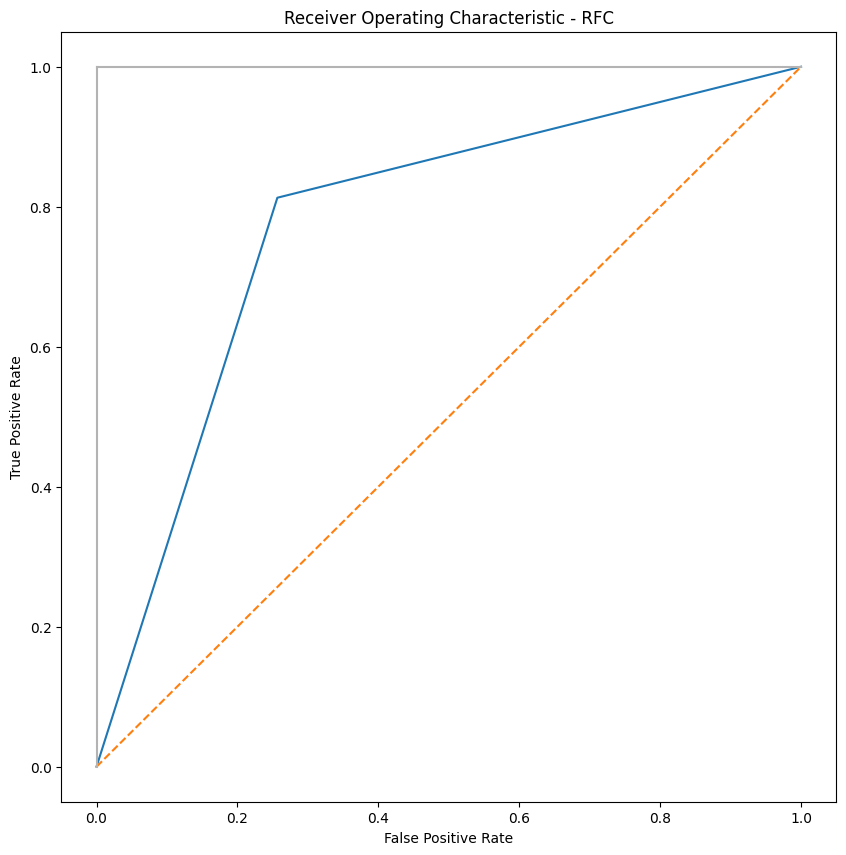

In [47]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RFC')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Now I will run the model with test data

In [49]:
test_data = pd.read_csv("/content/drive/MyDrive/playground-series-s3e24/test.csv")
test_data.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1


In [51]:
#Prediction the target
test_preds = gr_rfc.predict(test_data)
test_preds

array([1, 0, 0, ..., 0, 0, 0])

In [52]:
data_preds = pd.DataFrame()
data_preds["id"] = test_data["id"]
data_preds["smoking"] = test_preds
data_preds

,id,smoking
0,159256,1
1,159257,0
2,159258,0
3,159259,0
4,159260,1
...,...,...
106166,265422,1
106167,265423,1
106168,265424,0
106169,265425,0


In [54]:
data_preds.to_csv("/content/drive/MyDrive/test_prediction.csv", index = False)

In [ ]:
#Currently the Kaggle evaluated the ROC curve score : 0.78093